# Simple tests for interval overlap logic

Interval a *intersects* Interval b if `a.start` or `a.end` or both are strictly within in the bounds of `b.start` and `b.end`. That is, if `b.start < a.start < b.end` or `b.start < a.end < b.end`. 

Two intervals *coincide* iff one ore more of the following are true:
1. 
they are equal (i.e., have equal `start` and `end` values)
1. they have a non-zero overlap (as defined below)
1. one strictly encloses the other (as defined below)


Intervals that do not coincide are *non-coincident*. Alleles within a haplotype must be pairwise non-coincident.

Consider the following interbase Intervals in VMC:

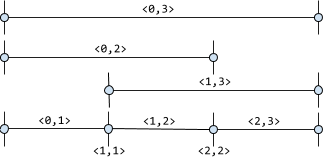

For the Interval `<1,3>`:
* Intervals `<0,2>`, `<0,3>`, `<1,2>`, `<1,3>`, and `<2,3>` overlap, and therefore coincide
* Interval `<2,2>` is strictly within, and therefore coincides
* Intervals `<0,1>` and `<1,1>` do not coincide

For the Interval `<2,2>`:
* Interval `<2,2>` (self) coincides by identity
* Intervals `<1,3>` and `<0,3>` coincide by stricty enclosing


In [1]:
from vmcdemo.interbaseinterval import InterbaseInterval
from IPython.display import display, Markdown

In [2]:
iis = [
    InterbaseInterval(0,3),
    InterbaseInterval(0,2),
    InterbaseInterval(1,3),
    InterbaseInterval(0,1),
    InterbaseInterval(1,2),
    InterbaseInterval(2,3),
    InterbaseInterval(1,1),
    InterbaseInterval(2,2),
    ]

INTERVAL_METHODS = "abuts coincides_with encloses intersects overlap overlaps".split()

In [3]:
def pairwise_apply(iis, method_name):
    """return matrix of method_name applied to iis pairs"""
    m = getattr(InterbaseInterval, method_name)
    return [[m(r,c) for c in iis] for r in iis]

def pairwise_apply_md(iis, method_name):
    """return markdown table of pairwise_apply"""
    tbl = [["r.{}(c)".format(method_name)] + [str(ii) for ii in iis]]
    tbl += [["-"] * len(tbl[0])]
    for ii, row in zip(iis, pairwise_apply(iis, method_name)):
        tbl += [[str(ii)] + row]
    tbl_str = "\n".join(["|".join(map(str,row)) for row in tbl])
    return Markdown("# "+method_name + "\n" + tbl_str)

In [4]:
for mn in INTERVAL_METHODS:
    display(pairwise_apply_md(iis, mn))

# abuts
r.abuts(c)|<0,3>|<0,2>|<1,3>|<0,1>|<1,2>|<2,3>|<1,1>|<2,2>
-|-|-|-|-|-|-|-|-
<0,3>|False|False|False|False|False|False|False|False
<0,2>|False|False|False|False|False|True|False|True
<1,3>|False|False|False|True|False|False|True|False
<0,1>|False|False|True|False|True|False|True|False
<1,2>|False|False|False|True|False|True|True|True
<2,3>|False|True|False|False|True|False|False|True
<1,1>|False|False|True|True|True|False|True|False
<2,2>|False|True|False|False|True|True|False|True

# coincides_with
r.coincides_with(c)|<0,3>|<0,2>|<1,3>|<0,1>|<1,2>|<2,3>|<1,1>|<2,2>
-|-|-|-|-|-|-|-|-
<0,3>|True|True|True|True|True|True|True|True
<0,2>|True|True|True|True|True|False|True|False
<1,3>|True|True|True|False|True|True|False|True
<0,1>|True|True|False|True|False|False|False|False
<1,2>|True|True|True|False|True|False|False|False
<2,3>|True|False|True|False|False|True|False|False
<1,1>|True|True|False|False|False|False|True|False
<2,2>|True|False|True|False|False|False|False|True

# encloses
r.encloses(c)|<0,3>|<0,2>|<1,3>|<0,1>|<1,2>|<2,3>|<1,1>|<2,2>
-|-|-|-|-|-|-|-|-
<0,3>|True|True|True|True|True|True|True|True
<0,2>|False|True|False|True|True|False|True|True
<1,3>|False|False|True|False|True|True|True|True
<0,1>|False|False|False|True|False|False|True|False
<1,2>|False|False|False|False|True|False|True|True
<2,3>|False|False|False|False|False|True|False|True
<1,1>|False|False|False|False|False|False|True|False
<2,2>|False|False|False|False|False|False|False|True

# intersects
r.intersects(c)|<0,3>|<0,2>|<1,3>|<0,1>|<1,2>|<2,3>|<1,1>|<2,2>
-|-|-|-|-|-|-|-|-
<0,3>|False|True|True|True|True|True|True|True
<0,2>|True|False|True|True|True|False|True|False
<1,3>|True|True|False|False|True|True|False|True
<0,1>|True|True|False|False|False|False|False|False
<1,2>|True|True|True|False|False|False|False|False
<2,3>|True|False|True|False|False|False|False|False
<1,1>|True|True|False|False|False|False|False|False
<2,2>|True|False|True|False|False|False|False|False

# overlap
r.overlap(c)|<0,3>|<0,2>|<1,3>|<0,1>|<1,2>|<2,3>|<1,1>|<2,2>
-|-|-|-|-|-|-|-|-
<0,3>|3|2|2|1|1|1|0|0
<0,2>|2|2|1|1|1|0|0|0
<1,3>|2|1|2|0|1|1|0|0
<0,1>|1|1|0|1|0|-1|0|-1
<1,2>|1|1|1|0|1|0|0|0
<2,3>|1|0|1|-1|0|1|-1|0
<1,1>|0|0|0|0|0|-1|0|-1
<2,2>|0|0|0|-1|0|0|-1|0

# overlaps
r.overlaps(c)|<0,3>|<0,2>|<1,3>|<0,1>|<1,2>|<2,3>|<1,1>|<2,2>
-|-|-|-|-|-|-|-|-
<0,3>|True|True|True|True|True|True|False|False
<0,2>|True|True|True|True|True|False|False|False
<1,3>|True|True|True|False|True|True|False|False
<0,1>|True|True|False|True|False|False|False|False
<1,2>|True|True|True|False|True|False|False|False
<2,3>|True|False|True|False|False|True|False|False
<1,1>|False|False|False|False|False|False|False|False
<2,2>|False|False|False|False|False|False|False|False